## Kaggle Titanic

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("/tmp/data_input/titanic_train.csv")
data_test = pd.read_csv("/tmp/data_input/titanic_test.csv")
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- PassengerId : 乘客ID
- Pclass      : 乘客等级(1/2/3等舱位)
- Name        : 乘客姓名
- Sex         : 性别
- Age         : 年龄
- SibSp       : 堂兄弟/妹个数
- Parch       : 父母与小孩个数
- Ticket      : 船票信息
- Fare        : 票价
- Cabin       : 客舱
- Embarked    : 登船港口

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


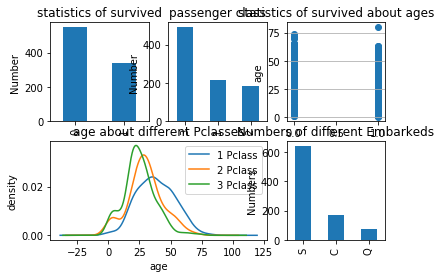

In [5]:
fig = plt.figure()
fig.set(alpha=0.2) # set color of alpha

plt.subplot2grid((2,3),(0,0)) # subplot to serval grids
data_train.Survived.value_counts().plot(kind="bar")
plt.title(u"statistics of survived")
plt.ylabel(u"Number")

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind="bar")
plt.title(u"passenger class")
plt.ylabel(u"Number")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived, data_train.Age)
plt.grid(b=True, which='major', axis='y')
plt.title(u"statistics of survived about ages")
plt.ylabel(u"age")

plt.subplot2grid((2,3),(1,0), colspan=2)
data_train.Age[data_train.Pclass == 1].plot(kind='kde')
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
plt.xlabel(u'age')
plt.ylabel(u'density')
plt.title(u'age about different Pclasses')
plt.legend((u'1 Pclass', u'2 Pclass', u'3 Pclass'), loc = 'best')

plt.subplot2grid((2,3), (1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u'Numbers of different Embarkeds')
plt.ylabel(u'Numbers')
plt.show()

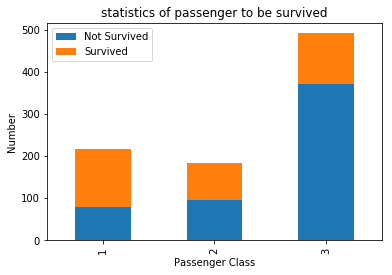

In [6]:
fig = plt.figure()
fig.set(alpha=0.2)
Survived_0 = data_train.Pclass[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Pclass[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'Survived': Survived_1, u'Not Survived': Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u'statistics of passenger to be survived') #不同等级乘客获救的情况
plt.ylabel(u'Number')  # 人数
plt.xlabel(u'Passenger Class') #乘客等级
plt.show()

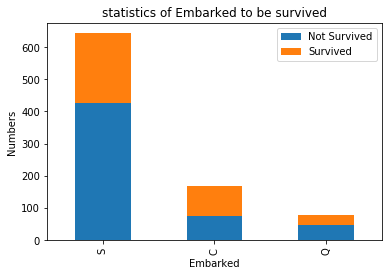

In [7]:
#看看各登陆港口对获救的分布情况
fig = plt.figure()
fig.set(alpha=0.2)
Survived_0 = data_train.Embarked[data_train.Survived == 0].value_counts()
Survived_1 = data_train.Embarked[data_train.Survived == 1].value_counts()
df = pd.DataFrame({u'Survived': Survived_1, u'Not Survived': Survived_0})
df.plot(kind='bar', stacked=True)
plt.title(u'statistics of Embarked to be survived')
plt.ylabel(u'Numbers')
plt.xlabel(u'Embarked')
plt.show()

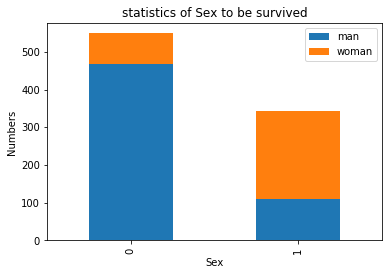

In [8]:
#看看性别对获救的影响
fig = plt.figure()
fig.set(alpha=0.2)
#Survived_m = data_train.Sex[data_train.Survived == 1].value_counts()
#Survived_w = data_train.Sex[data_train.Survived == 1].value_counts()
Survived_m = data_train.Survived[data_train.Sex == 'male'].value_counts()
Survived_w = data_train.Survived[data_train.Sex == 'female'].value_counts()
df = pd.DataFrame({u'man': Survived_m, u'woman': Survived_w})
df.plot(kind='bar', stacked=True)
plt.title(u'statistics of Sex to be survived')
plt.xlabel(u'Sex')
plt.ylabel(u'Numbers')
plt.show()

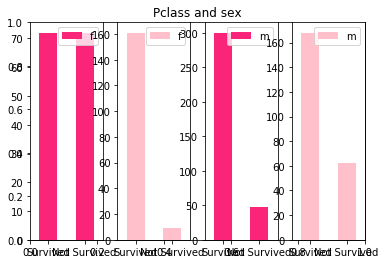

In [9]:
#查看各种船舱级别情况下不同性别获救的情况
fig = plt.figure()
fig.set(alpha=0.65)
plt.title(u'Pclass and sex') # 根据船舱级别和性别的获救情况

ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='female hightclass', color='#FA2479')
ax1.set_xticklabels([u'Survived', u'Not Survived'], rotation=0)
plt.legend(u'female/highclass', loc='best')

ax2 = fig.add_subplot(142)
data_train.Survived[data_train.Sex == 'female'][data_train.Pclass != 3].value_counts().plot(kind='bar',label='female lowclass', color='pink')
ax2.set_xticklabels([u'Survived', u'Not Survived'], rotation=0)
plt.legend(u'female/lowclass', loc='best')

ax3 = fig.add_subplot(143)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass == 3].value_counts().plot(kind='bar', label='male hightclass', color='#FA2479')
ax3.set_xticklabels([u'Survived', u'Not Survived'], rotation=0)
plt.legend(u'male/highclass', loc='best')

ax4 = fig.add_subplot(144)
data_train.Survived[data_train.Sex == 'male'][data_train.Pclass != 3].value_counts().plot(kind='bar',label='male lowclass', color='pink')
ax4.set_xticklabels([u'Survived', u'Not Survived'], rotation=0)
plt.legend(u'male/lowclass', loc='best')

plt.show()

In [10]:
#查看家族成员对获救情况的影响
g = data_train.groupby(['SibSp', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7

In [11]:
g = data_train.groupby(['Parch', 'Survived'])
df = pd.DataFrame(g.count()['PassengerId'])
df

PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      1                  40
3     0                   2
      1                   3
4     0                   4
5     0                   4
      1                   1
6     0                   1

In [12]:
#查看客舱统计
data_train.Cabin.value_counts()


G6             4
B96 B98        4
C23 C25 C27    4
E101           3
F2             3
C22 C26        3
F33            3
D              3
B51 B53 B55    2
E44            2
C126           2
F4             2
C92            2
D20            2
E24            2
C93            2
F G73          2
B18            2
C124           2
D26            2
D17            2
B20            2
C65            2
D35            2
C68            2
C2             2
B35            2
B77            2
D33            2
B28            2
              ..
E46            1
E17            1
A34            1
E49            1
A20            1
E68            1
D6             1
D48            1
D7             1
A31            1
E40            1
C95            1
E36            1
A24            1
A32            1
B71            1
B82 B84        1
F38            1
C47            1
C87            1
D46            1
E38            1
E63            1
B86            1
C86            1
D21            1
B78            1
B4            

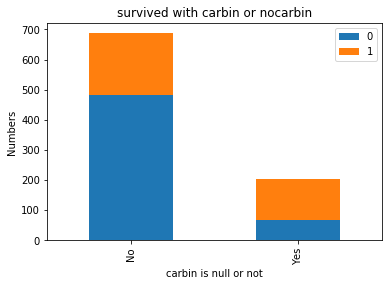

In [13]:
#查看carbine对获救情况的影响
fig = plt.figure()
fig.set(alpha=0.2)

Survived_carbin = data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
Survived_nocarbin = data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df = pd.DataFrame({u'Yes': Survived_carbin, u'No': Survived_nocarbin}).transpose()
df.plot(kind='bar', stacked=True)
plt.title('survived with carbin or nocarbin')
plt.xlabel('carbin is null or not')
plt.ylabel('Numbers')
plt.show()

## 缺省的数据，对后续的数据分析影响最大，比如age和carbine
应对缺省的数据，有以下几种处理方式：
- 1、如果缺值的样本占总数比例极高，我们可能就直接舍弃了，作为特征加入的话，可能反倒带入noise，影响最后的结果了
- 2、如果缺值的样本适中，而该属性非连续值特征属性(比如说类目属性)，那就把NaN作为一个新类别，加到类别特征中
- 3、如果缺值的样本适中，而该属性为连续值特征属性，有时候我们会考虑给定一个step(比如这里的age，我们可以考虑每隔2/3岁为一个步长)，然后把它离散化，之后把NaN作为一个type加到属性类目中。
- 4、有些情况下，缺失的值个数并不是特别多，那我们也可以试着根据已有的值，拟合一下数据，补充上。

In [14]:
from sklearn.ensemble import RandomForestRegressor
### 使用 RandomForestClassifier 填补缺失的年龄属性

def set_missing_ages(df):
    
    # 把已有的数据特征提取出来放进Random Forest Regressor中去
    df_age = df[['Age', 'Fare', 'Parch', 'SibSp', 'Pclass']]
    
    #乘客分成已知年龄和未知年龄两个部分
    known_age = df_age[df_age.Age.notnull()].as_matrix()
    unknown_age = df_age[df_age.Age.isnull()].as_matrix()
    
    # y即目标年龄
    y = known_age[:, 0]
    
    # X即特征
    X= known_age[:,1:]
    
    #fit到RandomForestRegressor中去
    rfr = RandomForestRegressor(random_state=0, n_estimators=2000, n_jobs=-1)
    rfr.fit(X, y)
    
    # 用得到的模型进行未知年龄结果预测
    predictedage = rfr.predict(unknown_age[:, 1:])
    
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()), 'Age'] = predictedage
    
    return df, rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()), 'Cabin'] = 'Yes'
    df.loc[(df.Cabin.isnull()), 'Cabin'] = 'No'
    
    return df

data_train, rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)
#data_train

In [15]:
# 因为逻辑回归建模时，需要输入的特征都是数值型特征
# 我们先对类目型的特征离散/因子化
# 以Cabin为例，原本一个属性维度，因为其取值可以是['yes','no']，而将其平展开为'Cabin_yes','Cabin_no'两个属性
# 原本Cabin取值为yes的，在此处的'Cabin_yes'下取值为1，在'Cabin_no'下取值为0
# 原本Cabin取值为no的，在此处的'Cabin_yes'下取值为0，在'Cabin_no'下取值为1
# 我们使用pandas的get_dummies来完成这个工作，并拼接在原来的data_train之上，如下所示

dummies_Cabin = pd.get_dummies(data_train['Cabin'], prefix='Cabin')

dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')

dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')

dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Sex, dummies_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
#df

In [16]:
# 接下来我们要接着做一些数据预处理的工作，比如scaling，将一些变化幅度较大的特征化到[-1,1]之内
# 这样可以加速logistic regression的收敛
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler()
age_scaler_param = scaler.fit(np.array(df['Age']).reshape(-1, 1))
df['Age_scaled'] = scaler.fit_transform(np.array(df['Age']).reshape(-1, 1), age_scaler_param)

fare_scaler_param = scaler.fit(np.array(df['Fare']).reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(np.array(df['Fare']).reshape(-1, 1), fare_scaler_param)
#df


将需要的feature字段提取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模。

In [17]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y就是获救的结果
y = train_np[:, 0]

# X就是特征属性
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6) #注意penalty的参数是字母l和数字1
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [18]:
X.shape

(891, 14)

## 接下来对测试集对相同的操作


In [19]:
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0
# 对测试集和训练集做一样的特征转换

#首先，利用随机森林填补确实的年龄数据
data_test, rfr = set_missing_ages(data_test)
data_test = set_Cabin_type(data_test)

# 其次，进行one_hot编码
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix='Embarked')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix='Pclass')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix='Sex')

# 然后，将编码结果连接到原有的数据中去
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Pclass, dummies_Sex], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace = True)

# 对数据进行scale
age_scaler_param = scaler.fit(np.array(df_test['Age']).reshape(-1, 1))
df_test['Age_scaled'] = scaler.fit_transform(np.array(df_test['Age']).reshape(-1, 1), age_scaler_param)
fare_scaler_param = scaler.fit(np.array(df_test['Fare']).reshape(-1, 1))
df_test['Fare_scaled'] = scaler.fit_transform(np.array(df_test['Fare']).reshape(-1, 1), fare_scaler_param)

df_test


,PassengerId,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_scaled,Fare_scaled
0,892,34.500000,0,0,7.8292,1,0,0,1,0,0,0,1,0,1,0.367101,-0.496637
1,893,47.000000,1,0,7.0000,1,0,0,0,1,0,0,1,1,0,1.331237,-0.511497
2,894,62.000000,0,0,9.6875,1,0,0,1,0,0,1,0,0,1,2.488200,-0.463335
3,895,27.000000,0,0,8.6625,1,0,0,0,1,0,0,1,0,1,-0.211380,-0.481704
4,896,22.000000,1,1,12.2875,1,0,0,0,1,0,0,1,1,0,-0.597035,-0.416740
5,897,14.000000,0,0,9.2250,1,0,0,0,1,0,0,1,0,1,-1.214082,-0.471623
6,898,30.000000,0,0,7.6292,1,0,0,1,0,0,0,1,1,0,0.020012,-0.500221
7,899,26.000000,1,1,29.0000,1,0,0,0,1,0,1,0,0,1,-0.288511,-0.117238
8,900,18.000000,0,0,7.2292,1,0,1,0,0,0,0,1,1,0,-0.905558,-0.507390
9,901,21.000000,2,0,24.1500,1,0,0,0,1,0,0,1,0,1,-0.674166,-0.204154


In [20]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
precisions = clf.predict(test)
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].as_matrix(), 'Survived': precisions.astype(np.int32)})
result.to_csv("/tmp/data_output/kaggle/Titanic_results/results.csv")

In [21]:
result_data = pd.read_csv("/tmp/data_output/kaggle/Titanic_results/results.csv")

## 过拟合和欠拟合的判断
对过拟合而言，通常以下策略对结果优化是有用的：

 - 做一下feature selection，挑出较好的feature的subset来做training
 - 提供更多的数据，从而弥补原始数据的bias问题，学习到的model也会更准确
 
而对于欠拟合而言，我们通常需要更多的feature，更复杂的模型来提高准确度

In [22]:
#导入数据处理库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.learning_curve import learning_curve

/home/ych/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ych/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


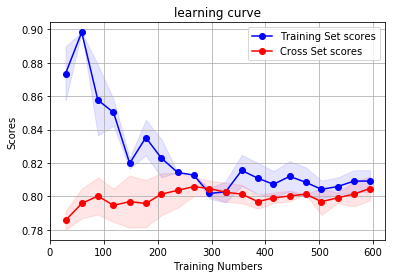

(array([ 0.8186096 ,  0.84260147,  0.81280255,  0.81349659,  0.7989299 ,
         0.80312012,  0.8001142 ,  0.80376468,  0.80642371,  0.79928439,
         0.79655087,  0.80106119,  0.79715931,  0.79764338,  0.79999204,
         0.80041799,  0.79397324,  0.79821281,  0.79832345,  0.8000737 ]),
 array([ 0.07739658,  0.11140723,  0.04737726,  0.05759197,  0.0354095 ,
         0.04298503,  0.02273113,  0.02116262,  0.01262075, -0.00133551,
        -0.00039093,  0.01042537,  0.00900248,  0.00343138,  0.00588402,
        -0.00185762,  0.01010377,  0.00457023,  0.00850042,  0.00526692]))

In [23]:
def plot_learning_curve(estimator, tilte, X, y, ylim=None, cv=None, n_jobs=1,
                       train_sizes = np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y, cv=cv, 
                                                            n_jobs=n_jobs, 
                                                            train_sizes=train_sizes,
                                                            verbose= verbose)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(tilte)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training Numbers")
        plt.ylabel("Scores")
        plt.gca().invert_yaxis()
        plt.grid()
        
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                        alpha=0.1, color='b')
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                        alpha=0.1, color='r')
        plt.plot(train_sizes, train_scores_mean, 'o-', color='b', label='Training Set scores')
        plt.plot(train_sizes, test_scores_mean, 'o-', color='r', label='Cross Set scores')
        
        plt.legend(loc = "best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
        
    midpoint = ((train_scores_mean - train_scores_std) + (test_scores_mean - test_scores_std)) / 2
    diff = (train_scores_mean - train_scores_std) - (test_scores_mean - test_scores_std)
    
    return midpoint, diff

plot_learning_curve(clf, 'learning curve', X, y)

从上述图中可以看出，曲线并不存在过拟合现象，可以考虑将新的特征加入该模型中去
下面来做交叉验证，即将训练集分为两个部分，一个部分用来训练模型，另外一部分用来做模型的检验，使用scikit-learn的cross_validation来完成上述工作。


In [24]:
# 查看模型的系数
pd.DataFrame({'columns': list(train_df.columns)[1:], 'coef': list(clf.coef_.T)})

,coef,columns
0,[-0.344235423381],SibSp
1,[-0.104915917187],Parch
2,[0.0],Cabin_No
3,[0.902108485747],Cabin_Yes
4,[0.0],Embarked_C
5,[0.0],Embarked_Q
6,[-0.417264096934],Embarked_S
7,[1.95657047487],Sex_female
8,[-0.67742105748],Sex_male
9,[0.341158229485],Pclass_1


In [56]:
from sklearn import cross_validation

clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
all_data = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

#数据集的特征属性
X = all_data.as_matrix()[:,1:]
#数据集的标记
y = all_data.as_matrix()[:, 0]

#对数据进行切分，包括训练集和测试集
split_train, split_cv = cross_validation.train_test_split(df, test_size = 0.3, random_state=0)
train_df = split_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
#生成训练模型
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
clf.fit(train_df.as_matrix()[:, 1:], train_df.as_matrix()[:, 0])

#进行交叉测试
cv_df = split_cv.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf.predict(cv_df.as_matrix()[:, 1:])
split_cv[ predictions != cv_df.as_matrix()[:,0] ].drop([])

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Age_scaled,Fare_scaled
298,299,1,41.574877,0,0,30.5000,0,1,0,0,1,0,1,1,0,0,0.875600,-0.034314
14,15,0,14.000000,0,0,7.8542,1,0,0,0,1,1,0,0,0,1,-1.148655,-0.490280
803,804,1,0.420000,0,1,8.5167,1,0,1,0,0,0,1,0,0,1,-2.145556,-0.476941
474,475,0,22.000000,0,0,9.8375,1,0,0,0,1,1,0,0,0,1,-0.561380,-0.450347
642,643,0,2.000000,3,2,27.9000,1,0,0,0,1,1,0,0,0,1,-2.029569,-0.086664
55,56,1,44.064830,0,0,35.5000,0,1,0,0,1,0,1,1,0,0,1.058386,0.066360
587,588,1,60.000000,1,1,79.2000,0,1,1,0,0,0,1,1,0,0,2.228178,0.946246
740,741,1,38.426632,0,0,30.0000,0,1,0,0,1,0,1,1,0,0,0.644490,-0.044381
839,840,1,50.910950,0,0,29.7000,0,1,1,0,0,0,1,1,0,0,1.560956,-0.050421
301,302,1,23.313683,2,0,23.2500,1,0,0,1,0,0,1,0,0,1,-0.464943,-0.180290


In [57]:
#查看预测错误的概率
origin_data_train = pd.read_csv("/tmp/data_input/titanic_train.csv")
bad_cases = origin_data_train.loc[origin_data_train['PassengerId'].isin(split_cv[predictions != split_cv.as_matrix()[:,0]]['PassengerId'])]
bad_cases

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.00,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.00,0,0,239865,26.0000,NaN,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.00,0,0,PC 17601,27.7208,NaN,C


现在来分析预测错误的bad_cases，进一步进行data mining
* Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
* Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
* Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
* Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
* 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
* 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
* 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
* 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
* Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。

上述方法可以作为后面DM的思路

In [64]:
#重新加载训练数据集
data_train = pd.read_csv("/tmp/data_input/titanic_train.csv")

#对名字中的“Major”字段进行过滤
data_train[data_train['Name'].str.contains('Major')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.50,C104,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.55,B38,S


In [65]:
#将Sex和Pclass进行结合
data_train['Sex_Pclass'] = data_train.Sex + "_" + data_train.Pclass.map(str)
data_train['Sex_Pclass']

0        male_3
1      female_1
2      female_3
3      female_1
4        male_3
5        male_3
6        male_1
7        male_3
8      female_3
9      female_2
10     female_3
11     female_1
12       male_3
13       male_3
14     female_3
15     female_2
16       male_3
17       male_2
18     female_3
19     female_3
20       male_2
21       male_2
22     female_3
23       male_1
24     female_3
25     female_3
26       male_3
27       male_1
28     female_3
29       male_3
         ...   
861      male_2
862    female_1
863    female_3
864      male_2
865    female_2
866    female_2
867      male_1
868      male_3
869      male_3
870      male_3
871    female_1
872      male_1
873      male_3
874    female_2
875    female_3
876      male_3
877      male_3
878      male_3
879    female_1
880    female_2
881      male_3
882    female_3
883      male_2
884      male_3
885    female_3
886      male_2
887    female_1
888    female_3
889      male_1
890      male_3
Name: Sex_Pclass, Length

In [66]:
#使用RandomForest对缺省数据进行填补
data_train. rfr = set_missing_ages(data_train)
data_train = set_Cabin_type(data_train)

dummies_Cabin  = pd.get_dummies(data_train['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_train['Embarked'], prefix='Embarked')
dummies_Pclass = pd.get_dummies(data_train['Pclass'], prefix='Pclass')
dummies_Sex = pd.get_dummies(data_train['Sex'], prefix='Sex')
dummies_Sex_Pclass = pd.get_dummies(data_train['Sex_Pclass'], prefix='Sex_Pclass')

df = pd.concat([data_train, dummies_Cabin, dummies_Embarked, dummies_Pclass, dummies_Sex, dummies_Sex_Pclass], axis=1)
df.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Sex_Pclass'], axis=1, inplace=True)


In [70]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

age_scaler_param = scaler.fit(np.array(df['Age']).reshape(-1, 1))
df['Age_scaled'] = scaler.fit_transform(np.array(df['Age']).reshape(-1, 1), age_scaler_param)

fare_scaler_param = scaler.fit(np.array(df['Fare']).reshape(-1, 1))
df['Fare_scaled'] = scaler.fit_transform(np.array(df['Fare']).reshape(-1, 1), fare_scaler_param)


In [72]:
from sklearn import linear_model

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.as_matrix()

# y就是获救的结果
y = train_np[:, 0]

# X就是特征属性
X = train_np[:, 1:]

# fit到RandomForestRegressor之中
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6) #注意penalty的参数是字母l和数字1
clf.fit(X, y)

clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=1e-06,
          verbose=0, warm_start=False)

In [74]:
data_test = pd.read_csv("/tmp/data_input/titanic_test.csv")
data_test.loc[(data_test.Fare.isnull()), 'Fare'] = 0
data_test['Sex_Pclass'] = data_test.Sex + "_" + data_test.Pclass.map(str)
# 对测试集和训练集做一样的特征转换

#首先，利用随机森林填补确实的年龄数据
data_test, rfr = set_missing_ages(data_test)
data_test = set_Cabin_type(data_test)

# 其次，进行one_hot编码
dummies_Cabin = pd.get_dummies(data_test['Cabin'], prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'], prefix='Embarked')
dummies_Pclass = pd.get_dummies(data_test['Pclass'], prefix='Pclass')
dummies_Sex = pd.get_dummies(data_test['Sex'], prefix='Sex')
dummies_Sex_Pclass = pd.get_dummies(data_test['Sex_Pclass'], prefix='Sex_Pclass')

# 然后，将编码结果连接到原有的数据中去
df_test = pd.concat([data_test, dummies_Cabin, dummies_Embarked, dummies_Pclass, dummies_Sex, dummies_Sex_Pclass], axis=1)
df_test.drop(['Pclass', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Sex_Pclass'], axis=1, inplace = True)

# 对数据进行scale
age_scaler_param = scaler.fit(np.array(df_test['Age']).reshape(-1, 1))
df_test['Age_scaled'] = scaler.fit_transform(np.array(df_test['Age']).reshape(-1, 1), age_scaler_param)
fare_scaler_param = scaler.fit(np.array(df_test['Fare']).reshape(-1, 1))
df_test['Fare_scaled'] = scaler.fit_transform(np.array(df_test['Fare']).reshape(-1, 1), fare_scaler_param)


In [75]:
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')
precisions = clf.predict(test)
result = pd.DataFrame({'PassengerId': data_test['PassengerId'].as_matrix(), 'Survived': precisions.astype(np.int32)})
result.to_csv("/tmp/data_output/kaggle/Titanic_results/results2.csv")

下面对数据进行集成学习，即将不同的学习模型进行融合，这里的融合分为两类：
* 用同一个训练集对多个不同的模型（包括回归，SVM，决策树等）进行学习，将不同的基模型进行融合
* 对同一个训练集分为多个不同的子训练集，用同一个模型进行学习，得到含有不同参数的基模型，对其进行模型融合

由于之前只使用了LogisticsRegresstion模型，所以后续采用第二种方案，也可以训练不同的模型，然后进行融合


In [78]:
from sklearn.ensemble import BaggingRegressor

train_df = df.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
train_np = train_df.as_matrix()

X = train_np[:, 1:]
y = train_np[:, 0]

#fit到BaggingRegression中去
clf = linear_model.LogisticRegression(C=1.0, penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=10, 
                               max_features=1.0, 
                               max_samples=0.8, 
                               bootstrap=True,
                               bootstrap_features=False, 
                               n_jobs=-1)
bagging_clf.fit(X, y)

test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass.*|Mother|Child|Family|Title')
predictions = bagging_clf.predict(test)

result = pd.DataFrame({'PassengerId': data_test['PassengerId'].as_matrix(), 
                       'Survived': predictions.astype(np.int32)})

result.to_csv("/tmp/data_output/kaggle/Titanic_results/bagging_results.csv")
